In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE  


In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv(url, names=columns, index_col='Id')
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Text(0.5, 1.0, 'Glass Type Distribution')

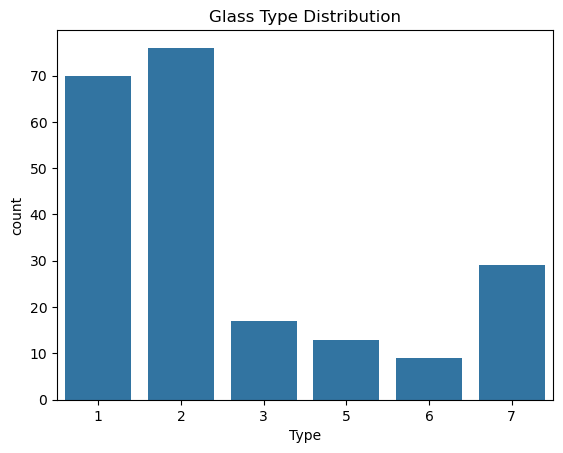

In [6]:
sns.countplot(x='Type', data=df)
plt.title("Glass Type Distribution")


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'RI'),
  Text(1, 0, 'Na'),
  Text(2, 0, 'Mg'),
  Text(3, 0, 'Al'),
  Text(4, 0, 'Si'),
  Text(5, 0, 'K'),
  Text(6, 0, 'Ca'),
  Text(7, 0, 'Ba'),
  Text(8, 0, 'Fe')])

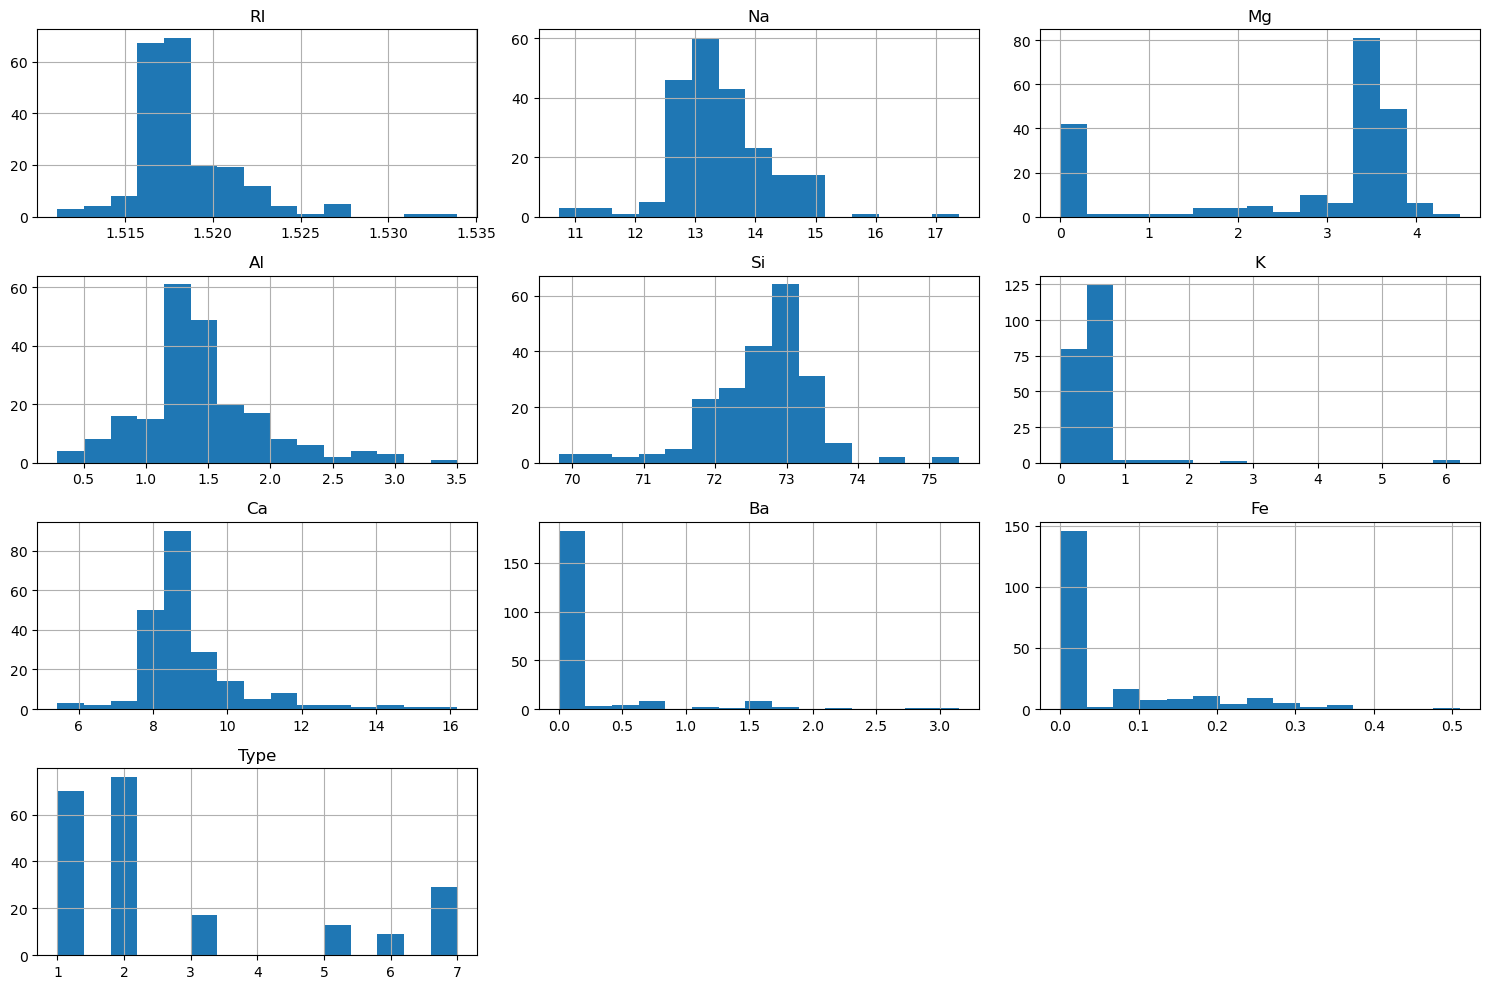

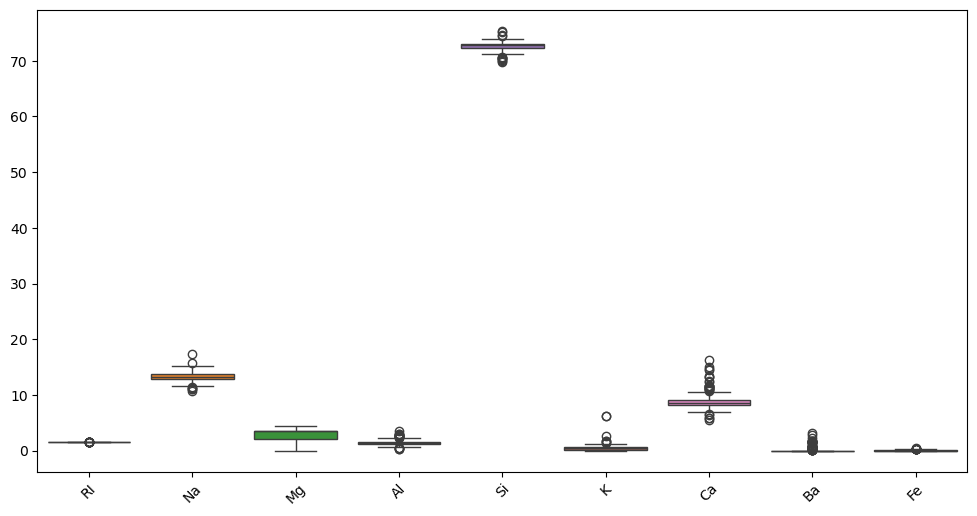

In [7]:
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.xticks(rotation=45)


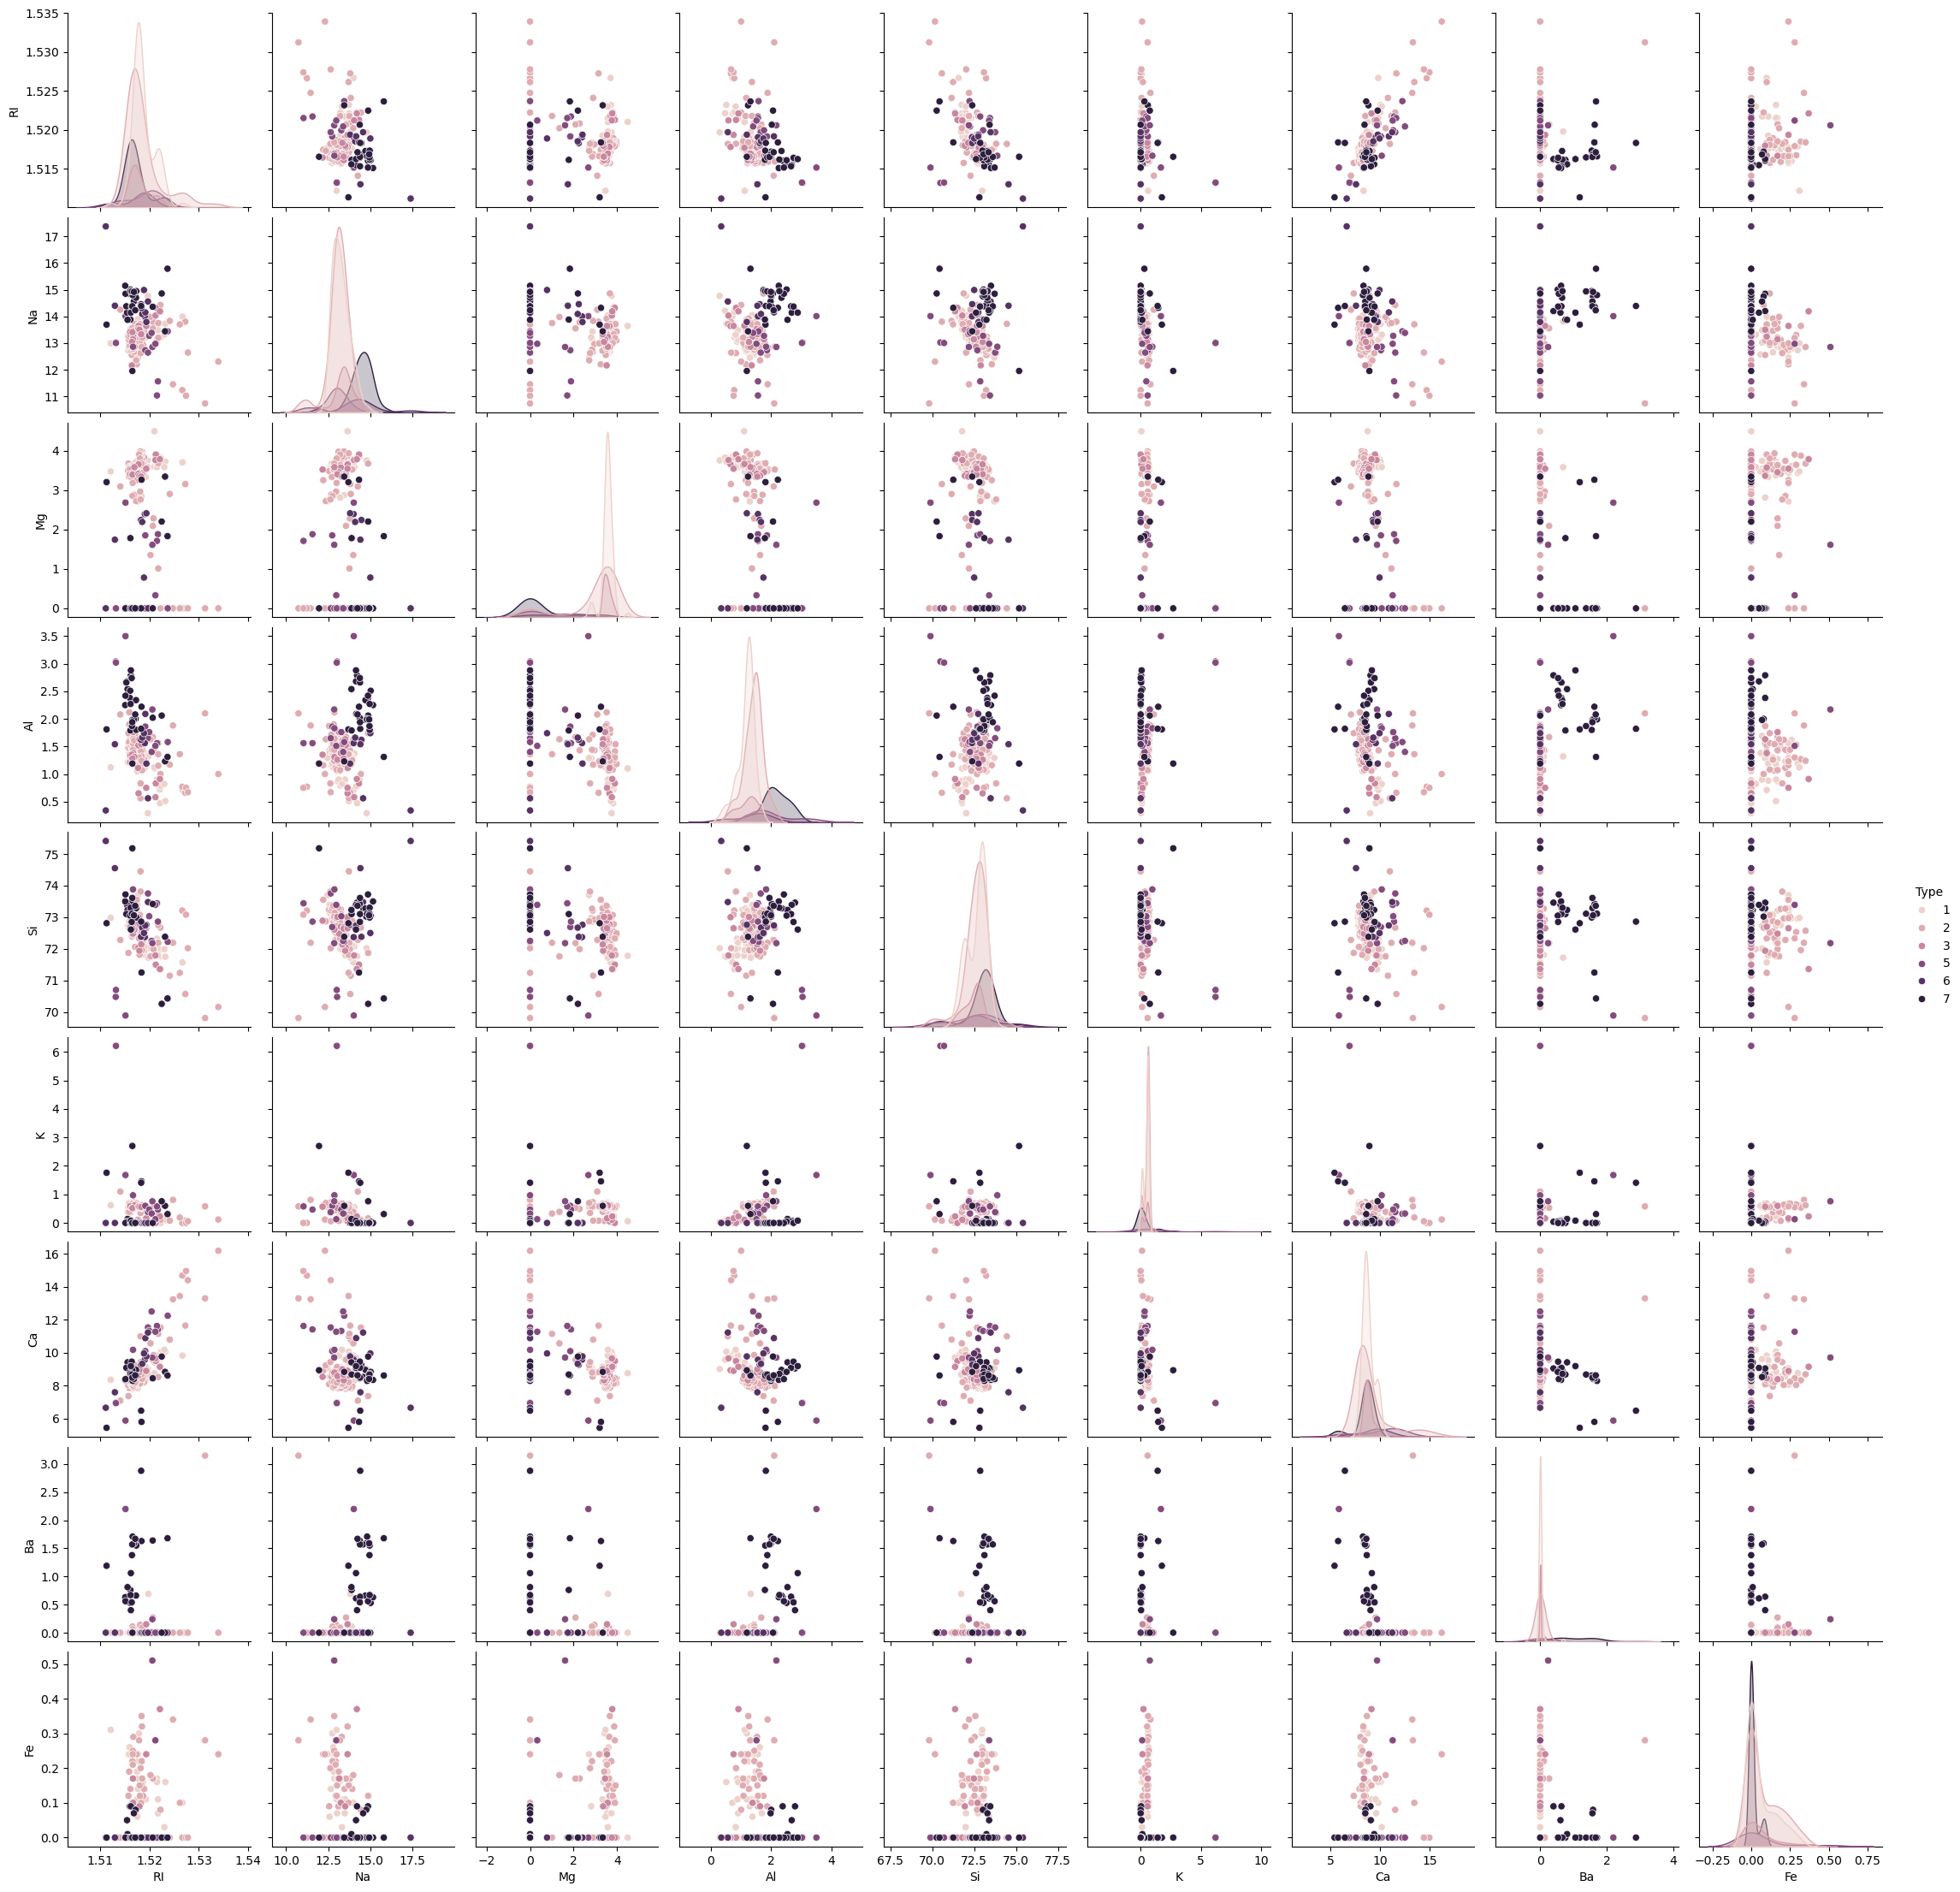

In [8]:
#Pairplot for correlation insight
sns.pairplot(df, hue='Type')


<Axes: >

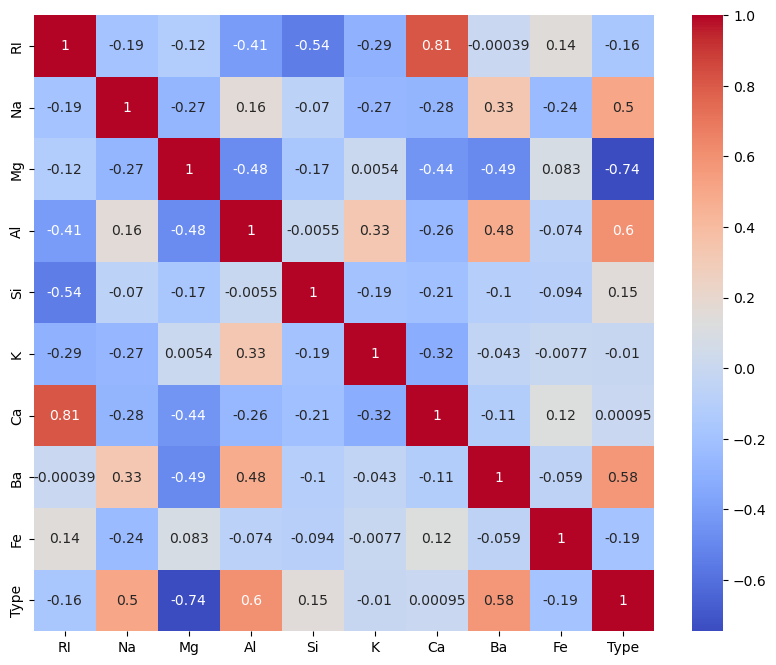

In [9]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [10]:
#Feature Scaling
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Text(0.5, 1.0, 'Balanced Class Distribution After SMOTE')

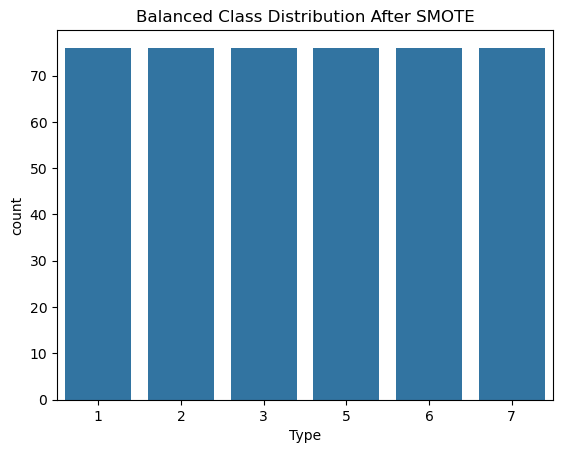

In [11]:
#Handling Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution After SMOTE")


In [12]:
#Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [13]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


Accuracy: 0.9239130434782609
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



<Axes: >

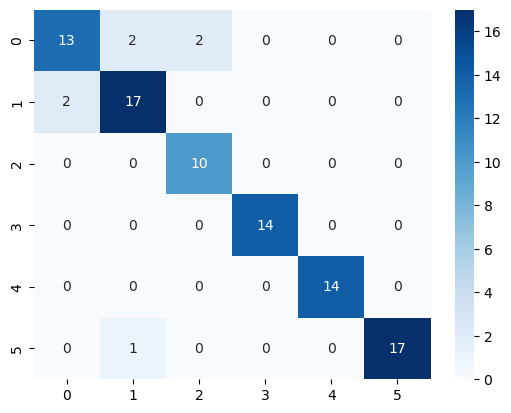

In [14]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


In [16]:
#Bagging and Boosting Comparison
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Bagging Accuracy: 0.9456521739130435


In [18]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))


Boosting Accuracy: 0.532608695652174


In [ ]:
#Overall Summary
Random Forest provided strong and stable classification results. 
#Bagging matched its performance closely,
#while Boosting required careful tuning to be effective. 
#Handling class imbalance (via SMOTE) significantly helped improve model generalization. 
#Ensemble methods remain a powerful choice for multi-class problems like glass type classification.